## Change Log
- This model will be 100% AI generated by ChatGPT's O3 model.
- I will be giving it the prompts for the creation of this model.
- The dataset that I am using is from Kaggle at the link here (https://www.kaggle.com/datasets/kazanova/sentiment140) but these are just tweets that have been taken directly from the twitter API.
- This dataset has 1.6 million rows.
- I am going to use an RNN for this as I havent used one before and I wanted to get some experience using it.


#### Learnings & Findings
- ChatGPT was giving me step by step processes of how it would be carried out.
- It then did the preprocessing which is fully documented below.
- We then moved on to building and training the model.
- This is where we ran into the first major issue, I accidentally told it there was 3 types of tweets rather than 2 so we were getting strange results because of it because the model obviously couldn't find a neutral tweet when there was none in the dataset.
- We then went back and updated a few fields that needed to be tweaked, once we did this the results seemed a lot more normal and as they should be. 
- Then we got the accuracy score which was sitting at 81% and the classification report and confusion matrix look as expected.
- We finally then showed an example of the model working with some synthetic tweets and it analysed all of them correctly.
- Using purely AI to write this model was good as it was interesting to see the whole steps and process that it takes to build a model, it did a lot more pre-processing than I usually would writing a model but I understand why.
- Using an RNN was good, they can be a very effective model with the right data and for me it worked extremely well.

The first prompt that I gave ChatGPT was this: 

We are going to create a RNN model for this twitter sentiment analysis dataset that I have to try and be able to accurately predict if the tweet is neutral, positive or negative

To which it gave me the steps it wants to take to build this model.

I then gave it this prompt:

Lets start by loading and pre proccesing the data, it is stored in a csv file called twitter.csv, there are 1.6 million rows in this data set and here is an example from the dataset so you understand the layout of the csv:

"0","1467810369","Mon Apr 06 22:19:45 PDT 2009","NO_QUERY","_TheSpecialOne_","@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

It then gave me code so I specified that I am doing this in a Jupyter Notebook to which we got the following code:

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


In [2]:
df = pd.read_csv('twitter.csv', encoding='latin-1', header=None)
df.columns = ['label', 'id', 'date', 'query', 'user', 'text']
df = df[['label', 'text']]
df.head()


,label,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
label_mapping = {0: 0, 2: 1, 4: 2}  # 0 = negative, 1 = neutral, 2 = positive
df['label'] = df['label'].map(label_mapping)


In [4]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)      # remove URLs
    text = re.sub(r"@\w+", "", text)         # remove mentions
    text = re.sub(r"#\w+", "", text)         # remove hashtags
    text = re.sub(r"[^a-z\s]", "", text)     # remove punctuation/numbers
    text = re.sub(r"\s+", " ", text).strip() # remove extra spaces
    return text

df['text'] = df['text'].apply(clean_text)
df['text'].head()


0    awww thats a bummer you shoulda got david carr...
1    is upset that he cant update his facebook by t...
2    i dived many times for the ball managed to sav...
3       my whole body feels itchy and like its on fire
4    no its not behaving at all im mad why am i her...
Name: text, dtype: object

In [5]:
tokenizer = Tokenizer(num_words=50000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])

sequences = tokenizer.texts_to_sequences(df['text'])
padded_sequences = pad_sequences(sequences, maxlen=50, padding='post', truncating='post')


In [ ]:
labels = to_categorical(df['label'], num_classes=3)

X_train, X_val, y_train, y_val = train_test_split(
    padded_sequences, labels, test_size=0.2, random_state=42
)

print(f"Vocabulary size: {len(tokenizer.word_index)}")
print(f"Training samples: {len(X_train)}, Validation samples: {len(X_val)}")


Vocabulary size: 415125
Training samples: 1280000, Validation samples: 320000


It gave me these code blocks, what it is doing at the start here first of all is just importing the libraries that it is going to need and loads the dataset

Then it re-mapped the sentiment field from 0,2 and 4 to 1,2 and 3 so that it will be more consistent and makes for easier processing.

Then it is cleaning the tweet column up to remove unneeded things suh as URLs, mentions, hashtags, punctuation.numbers and extra spaces, this is because it could affect the model's learning if it trying to base its answer off of pointless words.

It then used a tokeniser to convert the 50,000 most common words into numbers as this is what the model will use for its learning rather than actual words themselves. The padding is there to ensure that all of the sequences are the same length which is needed for the model.

Then it used one hot encoding on the sentiment result field and split the data into its training and test set.

Next we will move on to building the model.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

# Define the model
model = Sequential([
    Embedding(input_dim=50000, output_dim=64, input_length=50),  # (vocab size, embedding dim, input length)
    SimpleRNN(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 output classes: negative, neutral, positive
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Show model summary
model.summary()


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

This is the code that ChatGPT made for building the model.

The embedding model turns each wod index into a vector so the model can learn it.

Then it added the RNN layer which will process the word vectors.

It is then using a dropout layer to prevent the likelihood of the model overfitting to the training data.

Then there are 2 dense layers that continue to learn and finally create an output layer that can predict which class the tweet belongs to.

Now we will move onto training the model.

In [8]:
# Optional: add early stopping to prevent overfitting
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=5,               # You can increase this later
    batch_size=128,         # Try 64 or 256 if you want to experiment
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/5
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 192s 19ms/step - accuracy: 0.5007 - loss: 0.6999 - val_accuracy: 0.4984 - val_loss: 0.6933
Epoch 2/5
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 193s 19ms/step - accuracy: 0.6290 - loss: 0.6297 - val_accuracy: 0.7793 - val_loss: 0.4627
Epoch 3/5
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 184s 18ms/step - accuracy: 0.8030 - loss: 0.4441 - val_accuracy: 0.8054 - val_loss: 0.4261
Epoch 4/5
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 195s 19ms/step - accuracy: 0.7872 - loss: 0.4718 - val_accuracy: 0.7748 - val_loss: 0.4660
Epoch 5/5
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 191s 19ms/step - accuracy: 0.7002 - loss: 0.5618 - val_accuracy: 0.5868 - val_loss: 0.6753


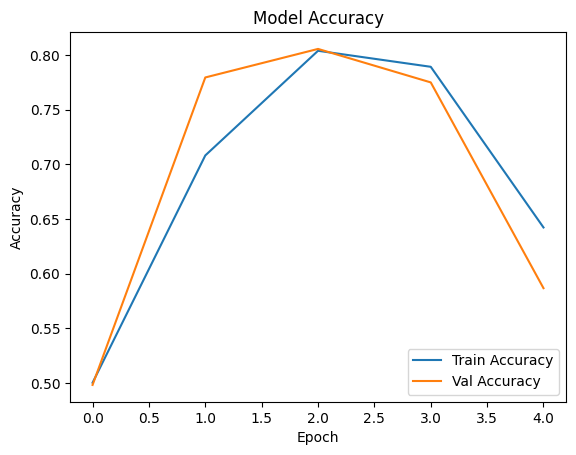

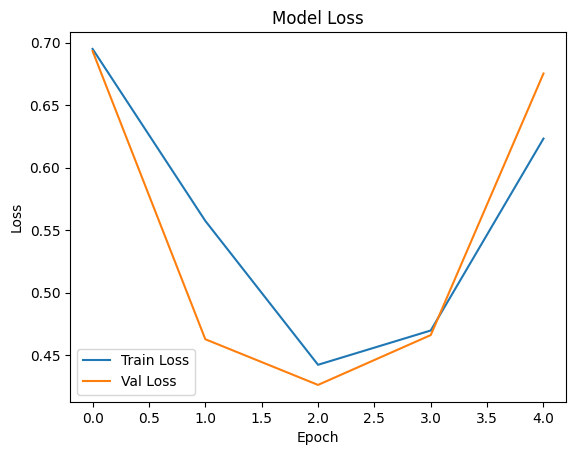

In [9]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [10]:
loss, accuracy = model.evaluate(X_val, y_val, verbose=1)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.8042 - loss: 0.4257
Validation Loss: 0.4261
Validation Accuracy: 0.8054


As can be seen the code that ChatGPT has generated is sitting at 80% accuracy which is a very good score for a model like this.

It was the best at 2 and 3 epochs where it was getting the most amount of growth in the accurcy and then it tailed off after that.

In [12]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred,
    labels=[0, 1, 2],
    target_names=['Negative', 'Neutral', 'Positive']
))



              precision    recall  f1-score   support

    Negative       0.79      0.83      0.81    159494
     Neutral       0.00      0.00      0.00         0
    Positive       0.82      0.78      0.80    160506

    accuracy                           0.81    320000
   macro avg       0.54      0.54      0.54    320000
weighted avg       0.81      0.81      0.81    320000



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-package

When it gave me this classifcation report I noticed that there was no neutral results which was strange so I gave it the output of this cell to which it told me to check the following:

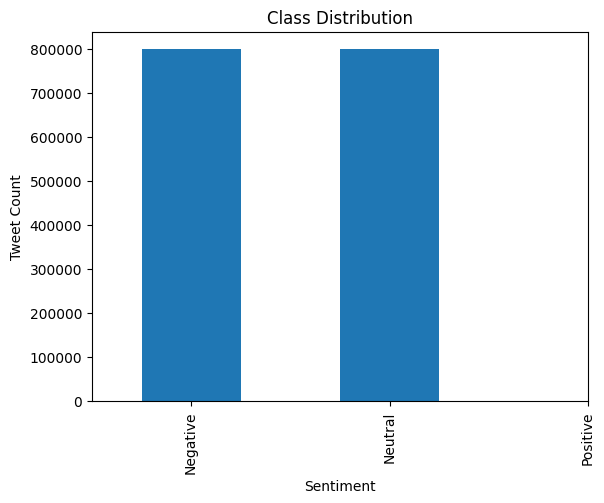

In [13]:
import matplotlib.pyplot as plt

df['label'].value_counts().sort_index().plot(kind='bar')
plt.xticks(ticks=[0,1,2], labels=['Negative', 'Neutral', 'Positive'])
plt.title("Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


As we can see here the positive column is completely empty so we need to check to make sure they actually exist within the dataset

In [14]:
print(df['label'].value_counts())


label
0    800000
2    800000
Name: count, dtype: int64


After doing some research, the model only has positive and negative results so I told chatGPT this and it told me to go back and update the label mapping, the model output layer and adjust label encoding for training which I will do below:

In [29]:
df = pd.read_csv('twitter.csv', encoding='latin-1', header=None)
df.columns = ['label', 'id', 'date', 'query', 'user', 'text']
df = df[['label', 'text']]
df.head()


,label,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [30]:
label_mapping = {0: 0, 4: 1}  # 0 = Negative, 1 = Positive
df['label'] = df['label'].map(label_mapping)


In [31]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)      # remove URLs
    text = re.sub(r"@\w+", "", text)         # remove mentions
    text = re.sub(r"#\w+", "", text)         # remove hashtags
    text = re.sub(r"[^a-z\s]", "", text)     # remove punctuation/numbers
    text = re.sub(r"\s+", " ", text).strip() # remove extra spaces
    return text

df['text'] = df['text'].apply(clean_text)
df['text'].head()


0    awww thats a bummer you shoulda got david carr...
1    is upset that he cant update his facebook by t...
2    i dived many times for the ball managed to sav...
3       my whole body feels itchy and like its on fire
4    no its not behaving at all im mad why am i her...
Name: text, dtype: object

In [32]:
tokenizer = Tokenizer(num_words=50000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])

sequences = tokenizer.texts_to_sequences(df['text'])
padded_sequences = pad_sequences(sequences, maxlen=50, padding='post', truncating='post')

In [33]:
labels = np.array(df['label'])  # ✅ Correct: Convert labels to a simple 1D array

X_train, X_val, y_train, y_val = train_test_split(
    padded_sequences, labels, test_size=0.2, random_state=42
)


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

# Define the model
model = Sequential([
    Embedding(input_dim=50000, output_dim=64, input_length=50),  # (vocab size, embedding dim, input length)
    SimpleRNN(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Show model summary
model.summary()

print(np.unique(labels))

/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

[0 1]


In [35]:
# Optional: add early stopping to prevent overfitting
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=5,               # You can increase this later
    batch_size=128,         # Try 64 or 256 if you want to experiment
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/5
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 193s 19ms/step - accuracy: 0.7548 - loss: 0.5174 - val_accuracy: 0.7867 - val_loss: 0.4452
Epoch 2/5
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 193s 19ms/step - accuracy: 0.8080 - loss: 0.4380 - val_accuracy: 0.7748 - val_loss: 0.4938
Epoch 3/5
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 193s 19ms/step - accuracy: 0.8174 - loss: 0.4223 - val_accuracy: 0.8112 - val_loss: 0.4227
Epoch 4/5
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 185s 18ms/step - accuracy: 0.8194 - loss: 0.4171 - val_accuracy: 0.8083 - val_loss: 0.4233
Epoch 5/5
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 190s 19ms/step - accuracy: 0.7939 - loss: 0.4375 - val_accuracy: 0.5017 - val_loss: 0.6931


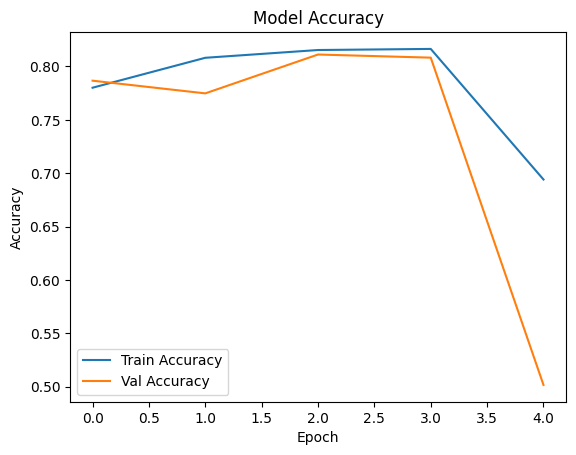

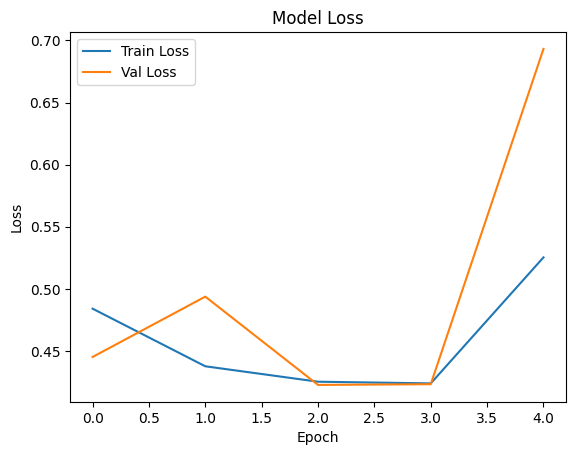

In [36]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
loss, accuracy = model.evaluate(X_val, y_val, verbose=1)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8109 - loss: 0.4221
Validation Loss: 0.4227
Validation Accuracy: 0.8112


As can be seen now we have an 80% accuracy after fixing that change to having only positive and negative reviews which is a great score.

In [38]:
from sklearn.metrics import classification_report

# Predict labels (convert sigmoid outputs to binary 0 or 1)
y_pred_probs = model.predict(X_val)
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to 0/1

# Print classification report
print(classification_report(y_val, y_pred, target_names=['Negative', 'Positive']))


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step
              precision    recall  f1-score   support

    Negative       0.81      0.81      0.81    159494
    Positive       0.81      0.82      0.81    160506

    accuracy                           0.81    320000
   macro avg       0.81      0.81      0.81    320000
weighted avg       0.81      0.81      0.81    320000



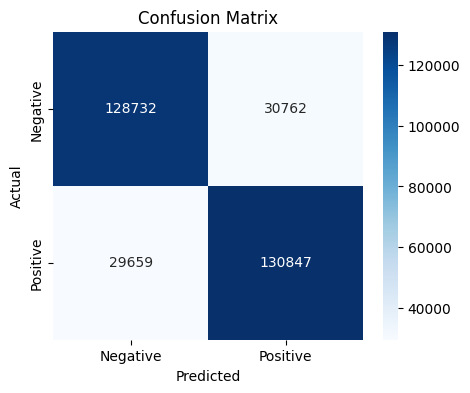

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


ChatGPT has now generated the classification report and the confusion matrix, as we can see it has about 81% accuracy which is a great score and overall is predicting the tweets correctly.

In [41]:
def predict_sentiment(tweet):
    cleaned_tweet = clean_text(tweet)  # Apply the same preprocessing
    sequence = tokenizer.texts_to_sequences([cleaned_tweet])
    padded = pad_sequences(sequence, maxlen=50, padding='post', truncating='post')
    
    prediction = model.predict(padded)[0, 0]
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    return sentiment, prediction

# Example tweets
test_tweets = [
    "I love this movie! It's amazing! 🎉",
    "This is the worst product I have ever bought.",
    "Not bad, but could be better.",
    "I'm extremely happy with the service!"
]

# Make predictions
for tweet in test_tweets:
    sentiment, score = predict_sentiment(tweet)
    print(f"Tweet: {tweet}\nPredicted Sentiment: {sentiment} (Confidence: {score:.4f})\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Tweet: I love this movie! It's amazing! 🎉
Predicted Sentiment: Positive (Confidence: 0.9798)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Tweet: This is the worst product I have ever bought.
Predicted Sentiment: Negative (Confidence: 0.0847)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Tweet: Not bad, but could be better.
Predicted Sentiment: Positive (Confidence: 0.6901)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Tweet: I'm extremely happy with the service!
Predicted Sentiment: Positive (Confidence: 0.9755)



This is an example of how the model can predict sample tweets and how confident it is.